<a href="https://colab.research.google.com/github/saad415/Deep-learning/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install beautifulsoup4
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.1 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from numpy import array
import tensorflow as tf

from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
movie_reviews = pd.read_csv("a1_IMDB_Dataset.csv")
movie_reviews = movie_reviews.head(10000)

In [ ]:
movie_reviews.info()

In [9]:
movie_reviews.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

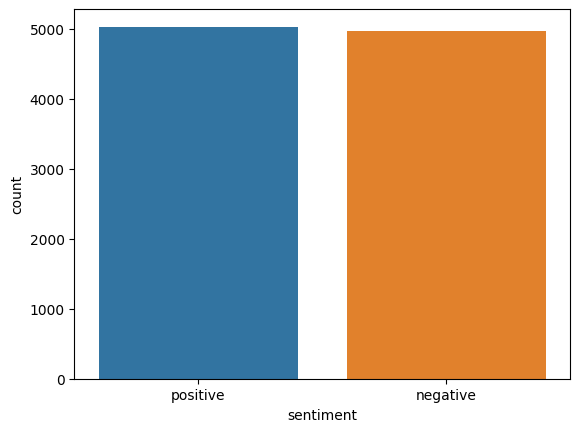

In [10]:
import seaborn as sns
sns.countplot(x='sentiment', data=movie_reviews)

**Data Preprocessing**


In [ ]:
X = movie_reviews['review'].tolist()
X

In [16]:
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    #text = text.lower()

    # Tokenize text
    words = text.split()

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Join words back into a sentence
    cleaned_text = " ".join(words)

    return cleaned_text


In [17]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

<ipython-input-16-3a6ee0d9d491>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [ ]:
X

In [18]:
# Converting sentiment labels to 0 & 1

y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Convert text data to TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(X).toarray()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

In [ ]:
X_train[1]

NameError: ignored

In [ ]:
maxlen = 100
vocab_size = 1000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models
# while test set will be used to evaluate how well our model performs

In [ ]:
X_train[0]

<1x691690 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix[0]



**LSTM**

In [23]:
# Build a simple LSTM model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128))  # Replace 1000 with the actual vocabulary size
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))


In [24]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/3
200/200 [==============================] - 165s 815ms/step - loss: 0.6937 - accuracy: 0.5002 - val_loss: 0.6943 - val_accuracy: 0.4969
Epoch 2/3
200/200 [==============================] - 161s 805ms/step - loss: 0.6935 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 3/3
146/200 [====================>.........] - ETA: 41s - loss: 0.6934 - accuracy: 0.5058

KeyboardInterrupt: ignored

In [25]:
snn_model = Sequential([
    Dense(16, activation='relu', input_shape=(None,128,1000)),
    Dense(1, activation='sigmoid')
])


In [26]:
# Compile the model
snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, None, 128, 16)     16016     
                                                                 
 dense_3 (Dense)             (None, None, 128, 1)      17        
                                                                 
Total params: 16,033
Trainable params: 16,033
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
50/50 [==============================] - 1s 8ms/step - loss: 0.6727 - acc: 0.7019 - val_loss: 0.6406 - val_acc: 0.8125
Epoch 2/6
50/50 [==============================] - 0s 5ms/step - loss: 0.5997 - acc: 0.8313 - val_loss: 0.5652 - val_acc: 0.8306
Epoch 3/6
50/50 [==============================] - 0s 5ms/step - loss: 0.5203 - acc: 0.8494 - val_loss: 0.4987 - val_acc: 0.8431
Epoch 4/6
50/50 [==============================] - 0s 4ms/step - loss: 0.4542 - acc: 0.8548 - val_loss: 0.4484 - val_acc: 0.8469
Epoch 5/6
50/50 [==============================] - 0s 5ms/step - loss: 0.4043 - acc: 0.8664 - val_loss: 0.4134 - val_acc: 0.8469
Epoch 6/6
50/50 [==============================] - 0s 4ms/step - loss: 0.3684 - acc: 0.8694 - val_loss: 0.3905 - val_acc: 0.8487


In [50]:
# New review for prediction
new_review = [" thought-provoking"]

# Convert the new review to TF-IDF representation
new_review_tfidf = tfidf_vectorizer.transform(new_review).toarray()

# Predict sentiment using the trained model
predicted_prob = snn_model.predict(new_review_tfidf)

# Interpret the prediction
if predicted_prob >= 0.5:
    sentiment = "positive"
else:
    sentiment = "negative"

print(sentiment)

1/1 [==============================] - 0s 59ms/step
positive


**Convolutional Neural Network**

In [43]:
from keras.layers import Conv1D


In [44]:
# Neural Network architecture

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=1000, output_dim=128))
#embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
#cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [45]:

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         128000    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         82048     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 210,177
Trainable params: 210,177
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
50/50 [==============================] - 95s 2s/step - loss: 0.6938 - acc: 0.4995 - val_loss: 0.6932 - val_acc: 0.4969
Epoch 2/6
50/50 [==============================] - 94s 2s/step - loss: 0.6933 - acc: 0.5014 - val_loss: 0.6931 - val_acc: 0.5031
Epoch 3/6
50/50 [==============================] - 90s 2s/step - loss: 0.6933 - acc: 0.4914 - val_loss: 0.6932 - val_acc: 0.4969
Epoch 4/6
50/50 [==============================] - 94s 2s/step - loss: 0.6933 - acc: 0.5008 - val_loss: 0.6931 - val_acc: 0.5031
Epoch 5/6
50/50 [==============================] - 89s 2s/step - loss: 0.6932 - acc: 0.4992 - val_loss: 0.6931 - val_acc: 0.5031
Epoch 6/6
50/50 [==============================] - 94s 2s/step - loss: 0.6933 - acc: 0.5030 - val_loss: 0.6931 - val_acc: 0.4969


In [48]:
# New review for prediction
new_review = [" movie was good not very good"]

# Convert the new review to TF-IDF representation
new_review_tfidf = tfidf_vectorizer.transform(new_review).toarray()

# Predict sentiment using the trained model
predicted_prob = cnn_model.predict(new_review_tfidf)

# Interpret the prediction
if predicted_prob >= 0.5:
    sentiment = "positive"
else:
    sentiment = "negative"

print(sentiment)

1/1 [==============================] - 0s 101ms/step
negative
